In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [3]:
league = {'brasileirao_a': ['Brasileirao'],
          'premier_league': ['Premier_League'],}


liga = league['brasileirao_a'][0]

In [4]:
historico = pd.read_excel(f'../datasets/{liga}/match_history/all_games/historico-2015a2023.xlsx')

In [5]:
historico.head()

,date,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,season,team
0,2023-04-15,Série A,1,Sat,Home,W,2,1,sao_paulo,0.9,2.0,33.0,12.0,3.0,2023,botafogo_rj
1,2023-04-24,Série A,2,Mon,Away,W,2,1,bahia,0.2,0.9,42.0,5.0,3.0,2023,botafogo_rj
2,2023-04-30,Série A,3,Sun,Away,W,3,2,flamengo,1.9,3.1,26.0,11.0,5.0,2023,botafogo_rj
3,2023-05-07,Série A,4,Sun,Home,W,2,0,atl_mineiro,2.0,0.5,39.0,22.0,7.0,2023,botafogo_rj
4,2023-05-11,Série A,5,Thu,Home,W,3,0,corinthians,2.6,0.6,53.0,15.0,5.0,2023,botafogo_rj


# Analise da variavel resposta

In [6]:
y = historico['gf']

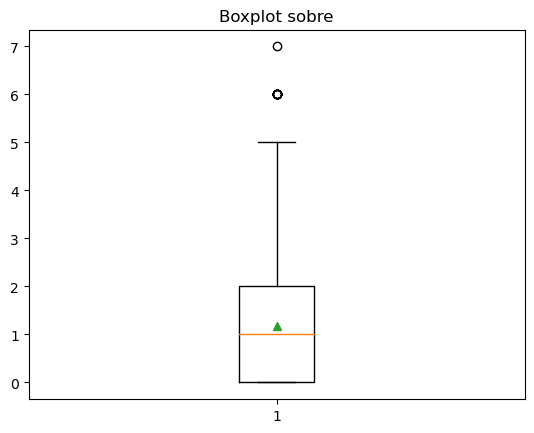

In [7]:
plt.boxplot(y, vert=True, showmeans= True)
plt.title("Boxplot sobre")
plt.show()

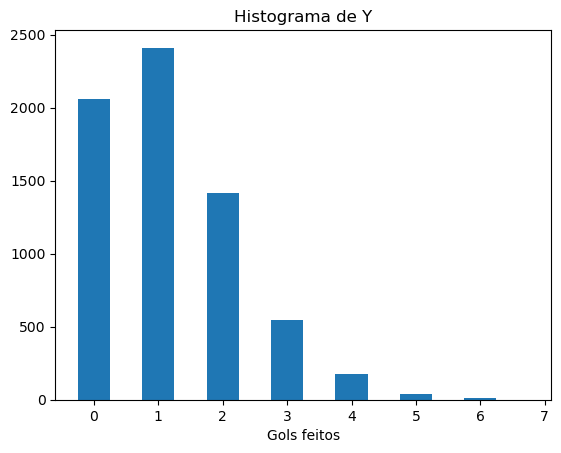

In [8]:
plt.hist(y, bins= 14, align='left')
plt.title('Histograma de Y')
plt.xlabel('Gols feitos')
plt.show()

In [9]:
y.describe()

count    6656.000000
mean        1.179838
std         1.094054
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: gf, dtype: float64

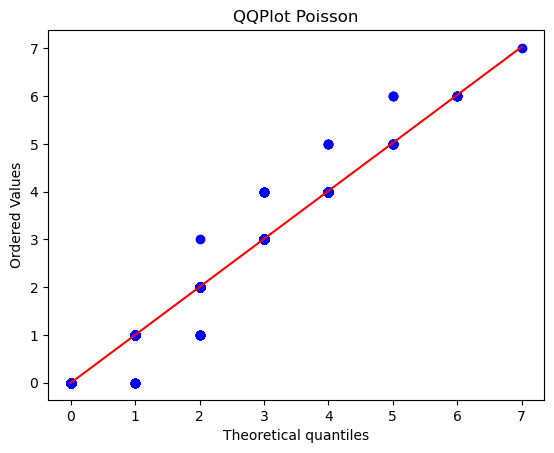

In [10]:
fig, ax = plt.subplots()
stats.probplot(y, dist= stats.poisson, sparams=(y.mean()), plot= ax)
plt.title('QQPlot Poisson')
plt.show()

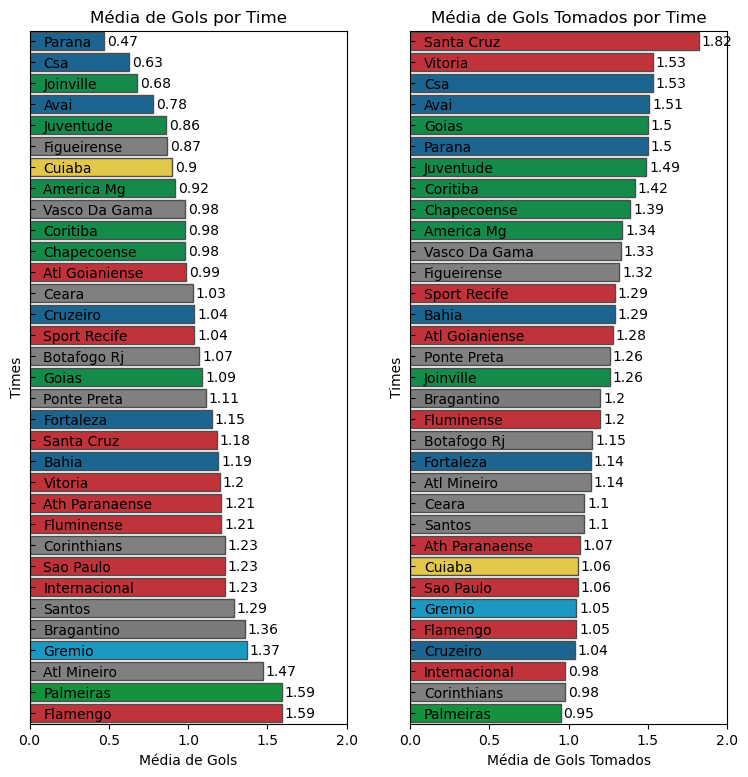

In [50]:
# Gols Feitos
df_sorted = historico.groupby(['team'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
df_sorted['gf'] = df_sorted['gf'].round(2)
df_sorted['team'] = df_sorted['team'].str.replace('_', ' ')
df_sorted['team'] = df_sorted['team'].str.title()

# Gols tomados
df_sorted1 = historico.groupby(['opponent'])['gf'].aggregate(np.mean).reset_index().sort_values('gf', ascending= False)
df_sorted1['gf'] = df_sorted1['gf'].round(2)
df_sorted1['opponent'] = df_sorted1['opponent'].str.replace('_', ' ')
df_sorted1['opponent'] = df_sorted1['opponent'].str.title()

# Define uma paleta de cores personalizada
team_colors = {
    'Parana': '#0A69A4',
    'Csa': '#0A69A4',
    'Joinville': '#009E49',
    'Avai': '#0A69A4',
    'Juventude': '#009E49',
    'Chapecoense': '#009E49',
    'Cuiaba': '#FDD731',
    'America Mg': '#009E49',
    'Coritiba': '#009E49',
    'Atl Goianiense': '#D91B26',
    'Cruzeiro': '#0A69A4',
    'Sport Recife': '#D91B26',
    'Goias': '#009E49',
    'Fortaleza': '#0A69A4',
    'Santa Cruz': '#D91B26',
    'Bahia': '#0A69A4',
    'Vitoria': '#D91B26',
    'Ath Paranaense': '#D91B26',
    'Fluminense': '#D91B26',
    'Sao Paulo': '#D91B26',
    'Internacional': '#D91B26',
    'Bragantino': '#7B7B7B',
    'Gremio': '#00A7DF',
    'Palmeiras': '#00A736',
    'Flamengo': '#D91B26'
}
custom_palette = [team_colors.get(team, 'gray') for team in df_sorted['team']]
custom_palette1 = [team_colors.get(team, 'gray') for team in df_sorted1['opponent']]


# Barplot Gols Feitos
fig, ax = plt.subplots(1, 2, figsize= (9, 9))
sns.barplot(data= df_sorted, x= 'gf', y= 'team', errorbar= None, palette= custom_palette, edgecolor= '0.3', width= 0.85, ax= ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize= 10, padding= 2)
ax[0].set_xlim(0, 2)
ax[0].tick_params(axis='y', direction='in',pad=-10)
ax[0].set_yticklabels(df_sorted['team'], horizontalalignment = "left")
ax[0].set_xlabel('Média de Gols')
ax[0].set_ylabel('Times')
ax[0].set_title('Média de Gols por Time')

# Barplot Gols Tomados
sns.barplot(data= df_sorted1, x= 'gf', y= 'opponent', errorbar= None, palette= custom_palette1, edgecolor= '0.3', width= 0.85, ax= ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize= 10, padding= 2)
ax[1].set_xlim(0, 2)
ax[1].tick_params(axis='y', direction='in',pad=-10)
ax[1].set_yticklabels(df_sorted1['opponent'], horizontalalignment = "left")
ax[1].set_xlabel('Média de Gols Tomados')
ax[1].set_ylabel('Times')
ax[1].set_title('Média de Gols Tomados por Time')

plt.show()

In [39]:
df_sorted['team'].unique()

array(['Parana', 'Csa', 'Joinville', 'Avai', 'Juventude', 'Figueirense',
       'Cuiaba', 'America Mg', 'Vasco Da Gama', 'Coritiba', 'Chapecoense',
       'Atl Goianiense', 'Ceara', 'Cruzeiro', 'Sport Recife',
       'Botafogo Rj', 'Goias', 'Ponte Preta', 'Fortaleza', 'Santa Cruz',
       'Bahia', 'Vitoria', 'Ath Paranaense', 'Fluminense', 'Corinthians',
       'Sao Paulo', 'Internacional', 'Santos', 'Bragantino', 'Gremio',
       'Atl Mineiro', 'Palmeiras', 'Flamengo'], dtype=object)

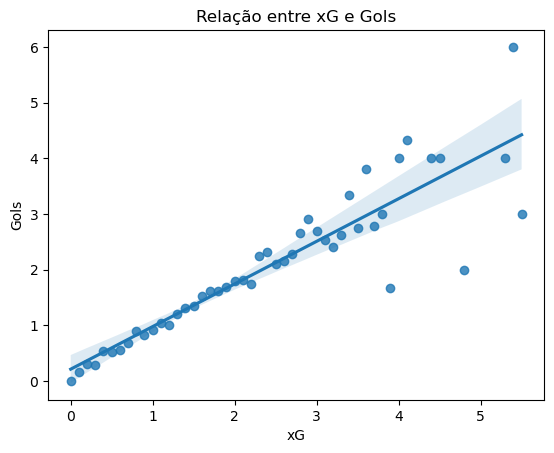

In [35]:
df_xg = historico.groupby(['xg'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, ax = plt.subplots()
ax = sns.regplot(data= df_xg, x= 'xg', y= 'gf')
plt.xlabel('xG')
plt.ylabel('Gols')
plt.title('Relação entre xG e Gols')
plt.show()

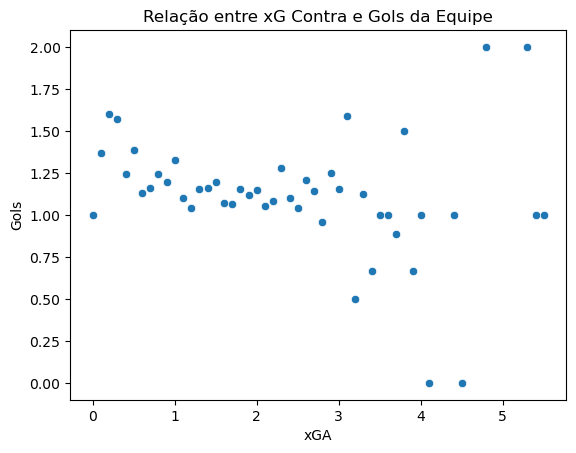

In [13]:
df_xga = historico.groupby(['xga'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, ax = plt.subplots()
ax = sns.scatterplot(data= df_xga, x= 'xga', y= 'gf')
plt.xlabel('xGA')
plt.ylabel('Gols')
plt.title('Relação entre xG Contra e Gols da Equipe')
plt.show()

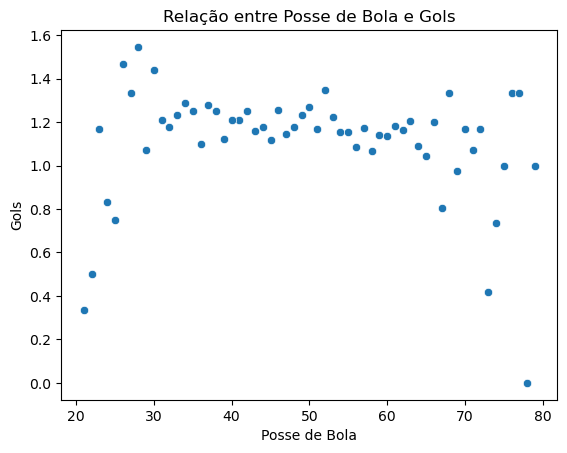

In [14]:
df_poss = historico.groupby(['poss'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, ax = plt.subplots()
ax = sns.scatterplot(data= df_poss, x= 'poss', y= 'gf')
plt.xlabel('Posse de Bola')
plt.ylabel('Gols')
plt.title('Relação entre Posse de Bola e Gols')
plt.show()

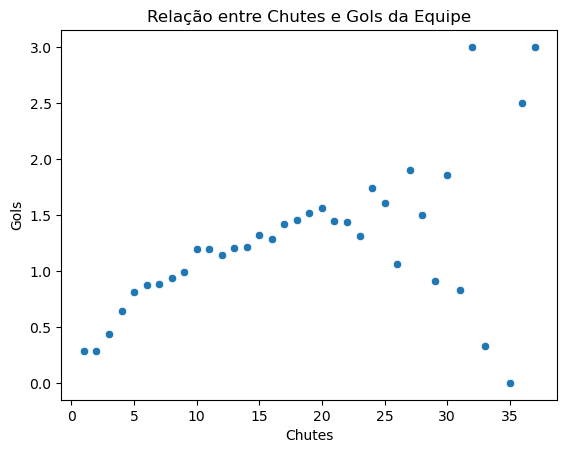

In [15]:
df_sh = historico.groupby(['sh'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, ax = plt.subplots()
ax = sns.scatterplot(data= df_sh, x= 'sh', y= 'gf')
plt.xlabel('Chutes')
plt.ylabel('Gols')
plt.title('Relação entre Chutes e Gols da Equipe')
plt.show()

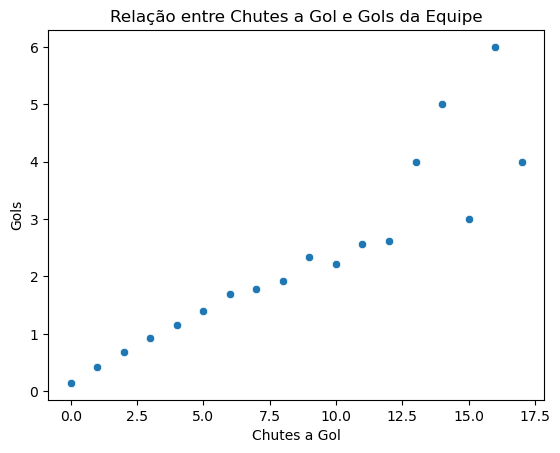

In [16]:
df_sot = historico.groupby(['sot'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, ax = plt.subplots()
ax = sns.scatterplot(data= df_sot, x= 'sot', y= 'gf')
plt.xlabel('Chutes a Gol')
plt.ylabel('Gols')
plt.title('Relação entre Chutes a Gol e Gols da Equipe')
plt.show()

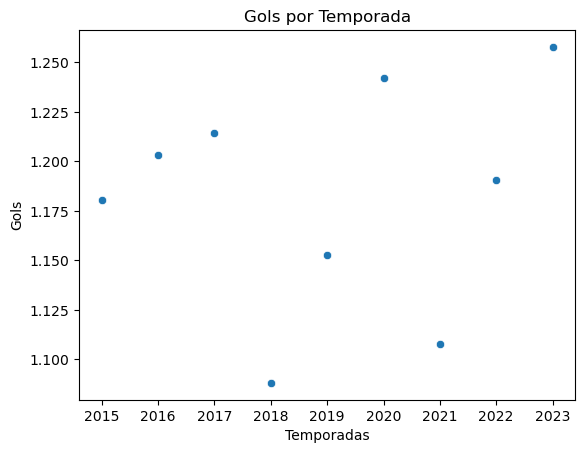

In [17]:
df_season = historico.groupby(['season'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, ax = plt.subplots()
ax = sns.scatterplot(data= df_season, x= 'season', y= 'gf')
plt.xlabel('Temporadas')
plt.ylabel('Gols')
plt.title('Gols por Temporada')
plt.show()